# Week 4 Assignment
## Classification - NLCD Impervious Classification (Data Processing)

In this assignment you will prepare the dataset for the binary classification task of classifying each pixel as either "impervious" or "not".

__Raster Files__: 

    - Landsat.tif (remotely sensed data in the form of surface reflactance, will be used as the input to our models) [values (0 - 10000)] numerical
    - Impervious.tif (NLCD fractional impervious map, will be used as our "ground truth" in training some of our modes) [values (0 - 100)] numerical
    - Dem.tif (ancillary data in the form of elevation data) [values (0 - 10000)] numerical
    - Aspect.tif (ancillary data in the form of downslope direction) [values (0 - 8)] categorical
    - Posidex.tif (ancially date in the form of positional index) [values (0 - 100)] numerical
    - Wetlands.tif (ancillary data in the form of wetlands information) [values (0 - 17)] categorical

## 1. Import the required libraries

> __HINT__: Find the libraries you need to import in the assignment instructions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Read the dataset
> Read in original csv data -> we will create a new processing function for our binary classification task

In [2]:
dataframe = pd.read_csv('s3://geokarma-testing/geoKARMA_h24v13_pixelbased_dataset.csv')
dataframe

,landsat_1,landsat_2,landsat_3,landsat_4,landsat_5,landsat_6,dem_1,aspect_1,posidex_1,wetlands_1,landcover_1,impervious_1,urban_count_7,urban_count_5,urban_count_3,xgeo,ygeo
0,164,373,233,2592,1096,429,254,2,47,0,42,0,14,2,0,1.051155e+06,1.247055e+06
1,271,418,292,2782,1439,635,257,15,28,0,41,0,17,10,4,1.056225e+06,1.241565e+06
2,454,832,850,3860,2671,1476,277,1,45,-1,81,0,0,0,0,1.128015e+06,1.313925e+06
3,187,345,198,2469,1117,441,242,8,27,-1,42,0,0,0,0,1.124175e+06,1.282395e+06
4,481,715,731,3519,2286,1386,239,1,91,0,21,13,16,11,5,1.156905e+06,1.320645e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,257,504,474,2794,1555,733,340,12,38,0,21,16,35,18,7,1.065225e+06,1.290975e+06
499996,202,386,207,3367,1275,476,325,10,47,0,42,0,0,0,0,1.074765e+06,1.298895e+06
499997,158,352,210,3074,1433,500,258,16,54,0,41,0,3,0,0,1.043805e+06,1.245045e+06
499998,143,378,233,3098,1217,503,274,9,-1,0,21,1,34,18,6,1.055205e+06,1.231785e+06


## 3. Create Classification Target
> create new column named "class". "class" == 0 where "impervious_0" == 0 and "class" == 1 where "impervious_1" > 0 

In [3]:
dataframe['class'] = dataframe.apply(lambda x: 0 if x['impervious_1'] == 0 else 1, axis=1)
dataframe

,landsat_1,landsat_2,landsat_3,landsat_4,landsat_5,landsat_6,dem_1,aspect_1,posidex_1,wetlands_1,landcover_1,impervious_1,urban_count_7,urban_count_5,urban_count_3,xgeo,ygeo,class
0,164,373,233,2592,1096,429,254,2,47,0,42,0,14,2,0,1.051155e+06,1.247055e+06,0
1,271,418,292,2782,1439,635,257,15,28,0,41,0,17,10,4,1.056225e+06,1.241565e+06,0
2,454,832,850,3860,2671,1476,277,1,45,-1,81,0,0,0,0,1.128015e+06,1.313925e+06,0
3,187,345,198,2469,1117,441,242,8,27,-1,42,0,0,0,0,1.124175e+06,1.282395e+06,0
4,481,715,731,3519,2286,1386,239,1,91,0,21,13,16,11,5,1.156905e+06,1.320645e+06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,257,504,474,2794,1555,733,340,12,38,0,21,16,35,18,7,1.065225e+06,1.290975e+06,1
499996,202,386,207,3367,1275,476,325,10,47,0,42,0,0,0,0,1.074765e+06,1.298895e+06,0
499997,158,352,210,3074,1433,500,258,16,54,0,41,0,3,0,0,1.043805e+06,1.245045e+06,0
499998,143,378,233,3098,1217,503,274,9,-1,0,21,1,34,18,6,1.055205e+06,1.231785e+06,1


## 4. Get basic information about the dataset

#### 4a. Print dimensions of the dataset

In [4]:
dataframe.shape

(500000, 18)

#### 4b. Print the column names

In [5]:
dataframe.columns

Index(['landsat_1', 'landsat_2', 'landsat_3', 'landsat_4', 'landsat_5',
       'landsat_6', 'dem_1', 'aspect_1', 'posidex_1', 'wetlands_1',
       'landcover_1', 'impervious_1', 'urban_count_7', 'urban_count_5',
       'urban_count_3', 'xgeo', 'ygeo', 'class'],
      dtype='object')

#### 4c. Print the first five observations

In [6]:
dataframe.head()

,landsat_1,landsat_2,landsat_3,landsat_4,landsat_5,landsat_6,dem_1,aspect_1,posidex_1,wetlands_1,landcover_1,impervious_1,urban_count_7,urban_count_5,urban_count_3,xgeo,ygeo,class
0,164,373,233,2592,1096,429,254,2,47,0,42,0,14,2,0,1.051155e+06,1.247055e+06,0
1,271,418,292,2782,1439,635,257,15,28,0,41,0,17,10,4,1.056225e+06,1.241565e+06,0
2,454,832,850,3860,2671,1476,277,1,45,-1,81,0,0,0,0,1.128015e+06,1.313925e+06,0
3,187,345,198,2469,1117,441,242,8,27,-1,42,0,0,0,0,1.124175e+06,1.282395e+06,0
4,481,715,731,3519,2286,1386,239,1,91,0,21,13,16,11,5,1.156905e+06,1.320645e+06,1


#### 4d. Print the datatypes of the columns in the dataset using .dtypes

In [7]:
dataframe.dtypes

landsat_1          int64
landsat_2          int64
landsat_3          int64
landsat_4          int64
landsat_5          int64
landsat_6          int64
dem_1              int64
aspect_1           int64
posidex_1          int64
wetlands_1         int64
landcover_1        int64
impervious_1       int64
urban_count_7      int64
urban_count_5      int64
urban_count_3      int64
xgeo             float64
ygeo             float64
class              int64
dtype: object

## EXPLORATORY DATA ANALYSIS

## 5. Univariate exploratory data analysis

> __COUNTPLOT:__ A countplot shows the number of occurrences of each value (category) in the data.

> __seaborn.countplot()__ method is used to show the counts of observations in each category using bars.

> Seaborn is a Python data visualization library that provides a high-level interface for drawing attractive and informative statistical graphics.

#### 5a. Plot a countplot of "class"
> __NOTE__: It is important to take a look at the distribution of the "target" class

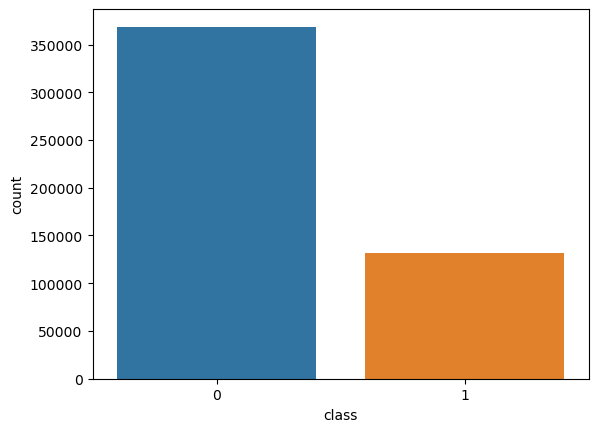

In [8]:
sns.countplot(x="class", data=dataframe)
plt.show()

#### 5b. Plot a countplot of "aspect_1" 

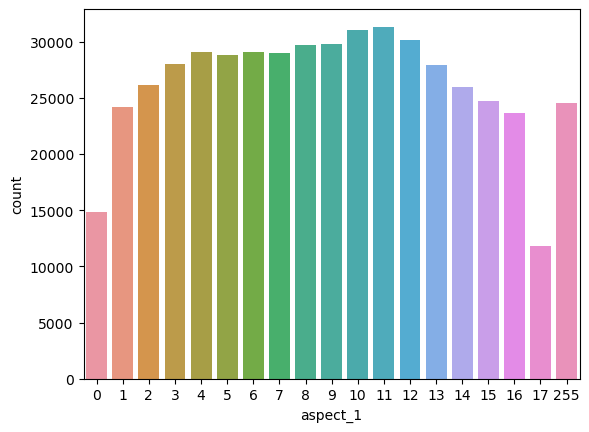

In [9]:
sns.countplot(x="aspect_1", data=dataframe)
plt.show()

#### 5c. Plot a countplot of "wetlands_1" 

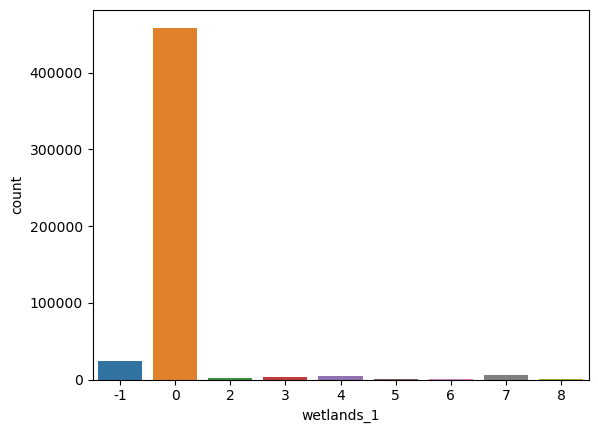

In [10]:
sns.countplot(x="wetlands_1", data=dataframe)
plt.show()

###  Histogram

> A histogram is a graphical representation of data where data is grouped into continuous number ranges. Each range corresponds to a vertical bar.

#### 5d. Plot a histogram of all landsat bands on the same Plot

> __HINT__: sns.hisplot([data[col1], data[col2]], color=[col1, col2], alpha=0.5)

> What can you say about the distribution? Is it left-skewed, right-skewed or symmetric?

<Axes: ylabel='Count'>

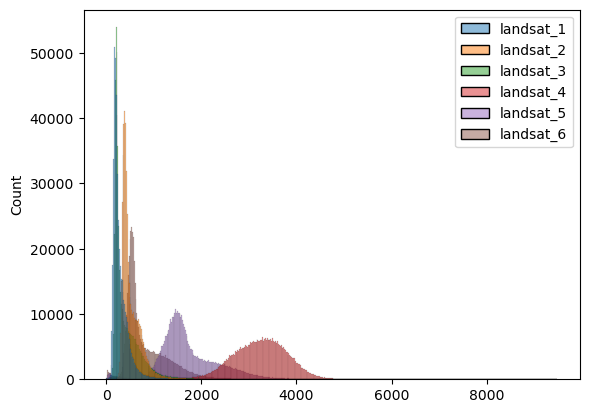

In [11]:
sns.histplot([dataframe['landsat_1'], dataframe['landsat_2'], dataframe['landsat_3'], dataframe['landsat_4'], dataframe['landsat_5'], dataframe['landsat_6']], alpha=0.5)

### Kernel Density Estimate plot

> Kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. It is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

#### 5e. Plot a KDE plot of "posidex_1"

<Axes: xlabel='posidex_1', ylabel='Density'>

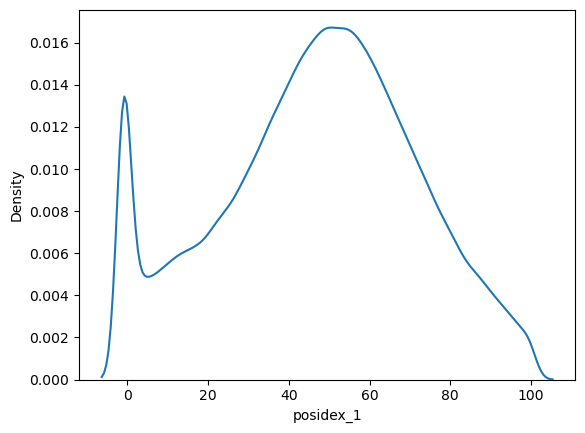

In [12]:
sns.kdeplot(x="posidex_1", data=dataframe)

__BOXPLOT:__ A boxplot is a standardized way of displaying the distribution of data based on:
- The minimum value
- First quartile (Q1)
- Median
- Third quartile (Q3)
- The maximum value

> It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and the skewness of your data

#### 5f. Plot a box plot of all Landsat Bands

> __HINT__: use subplots to plot all violins in the same row

colors = ['blue', 'green', 'red', 'orange', 'pink', 'purple']

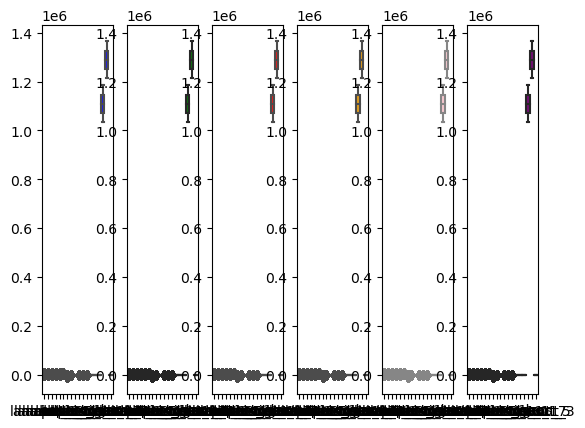

In [13]:
colors = ['blue', 'green', 'red', 'orange', 'pink', 'purple']
fig, axs = plt.subplots(ncols=6)
for i in range(6):
    sns.boxplot(data=dataframe, ax=axs[i], color=colors[i])

### Violin Plot

> Violin plot shows similar statistics as a boxplot but is more informative. While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot also shows the full distribution of the data.

> The thickness of the violin plot shows density of data at a given y value. Wider sections represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability

#### 5g. Plot a violin plot of all Landsat Bands

> __HINT__: use subplots to plot all violins in the same row

colors = ['blue', 'green', 'red', 'orange', 'pink', 'purple']

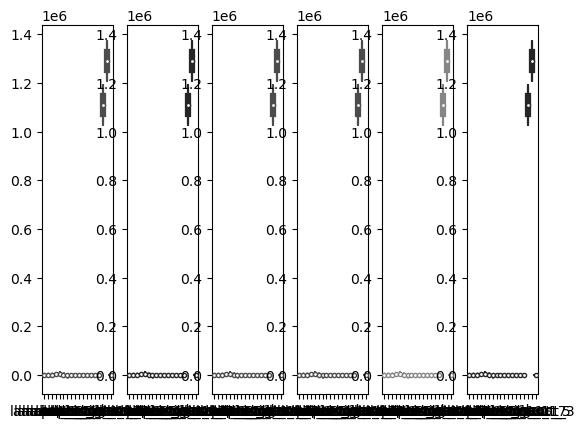

In [15]:
colors = ['blue', 'green', 'red', 'orange', 'pink', 'purple']
fig, axs = plt.subplots(ncols=6)
for i in range(6):
    sns.violinplot(data=dataframe, ax=axs[i], color=colors[i])

## 6. Multivariate exploratory data analysis

### Bar charts

> A stacked bar graph  is a chart that uses bars to show comparisons between categories of data, but with ability to break down and compare parts of a whole. In a stacked bar graph, each bar represents a whole, and segments in the bar represent different parts of that whole.

#### 6a. Plot a stacked bar chart of "wetlands_1" and "class"

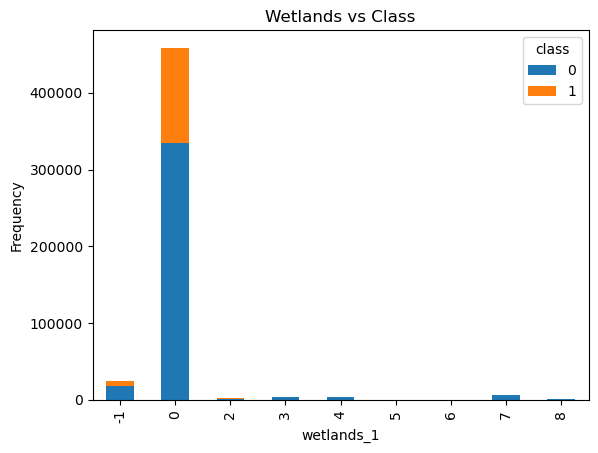

In [16]:
pd.crosstab(dataframe['wetlands_1'], dataframe['class']).plot(kind="bar", stacked=True)
plt.title('Wetlands vs Class')
plt.ylabel('Frequency')
plt.show()

## 7. Print a heatmap with correlations of the numerical variables

> __HINT__: You can check the assignment instructions for the code

>__HINT__: numerical values = ['landsat_1', 'landsat_2', 'landsat_3', 'landsat_4', 'landsat_5',
       'landsat_6', 'dem_1', 'posidex_1', 
       'impervious_1']

<Axes: >

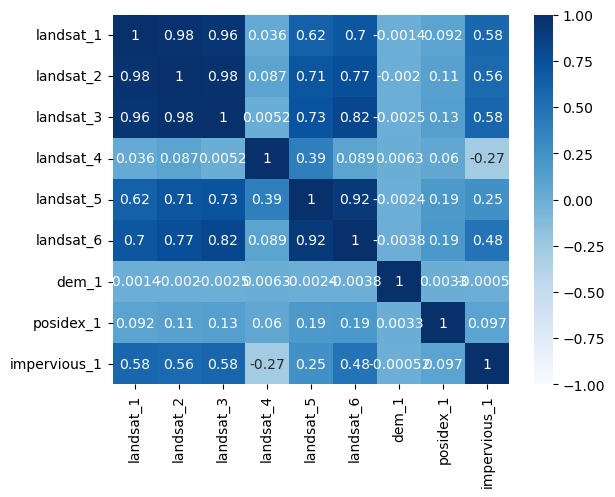

In [17]:
columns = ['landsat_1', 'landsat_2', 'landsat_3', 'landsat_4', 'landsat_5', 'landsat_6', 'dem_1', 'posidex_1', 'impervious_1']
plt.figure(figsize=(10,7))
sns.heatmap(dataframe[columns].corr(), annot=True, vmin=-1.0, vmax=1.0, cmap="Blues")

## 8. Define Processing Function
>__HINT__: create a python function take takes as input the path to your csv and returns a preprocessed dataframe following all the PROCESSING steps you completed in this assignment

>__HINT__: This is similar to what we did for the regression models, the only difference is we want all pixels with 0-100 so we won't subset the data but we still want to remove the invalid values and one-hot encode the categorical features and fill the missing/no-data values

>__NOTE__: write out the functions you use a lot to a functions.py file that way you can import then from that file and not rewrite them in each new notebook

>__i.e__: from functions import one_hot_encode, regression_preprocess, binary_classification_preprocess

In [21]:
def binary_classification_preprocess(dataframe):
    # create target 'class' column
    dataframe['class'] = dataframe.apply(lambda x: 0 if x['impervious_1'] == 0 else 1, axis=1)
    # drop invalid observations
    dataframe = dataframe.loc[(
        (dataframe['landsat_1'] != 0) &
        (dataframe['landsat_2'] != 0) &
        (dataframe['landsat_3'] != 0) &
        (dataframe['landsat_4'] != 0) &
        (dataframe['landsat_5'] != 0) &
        (dataframe['landsat_6'] != 0))]
    # reset index
    dataframe = dataframe.reset_index(drop=True)
    # fill invalid values
    dataframe['dem_1'] = dataframe['dem_1'].replace(-9999, dataframe['dem_1'].mean())
    dataframe['aspect_1'] = dataframe['aspect_1'].replace(255, 18)
    dataframe['wetlands_1'] = dataframe['wetlands_1'].replace(-1, 0)
    # one hot encode categorical features
    dataframe = one_hot_encode(dataframe, "aspect_1")
    dataframe = one_hot_encode(dataframe, "wetlands_1")
    
    return dataframe
